# Cleaning

We load the csv file and view the first rows

In [ ]:
import pandas as pd

# Load the CSV into a DataFrame
df_2015 = pd.read_csv('../data/raw/2015.csv')  

# Configurar pandas para mostrar más filas y columnas
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Show first rows for initial scan
df_2015.head(5)


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


We remove the columns that we do not need for our future analysis.

In [33]:
# Eliminar columnas innecesarias (suponiendo que algunas no son útiles para el análisis)
columns_to_drop = ['Standard Error', 'Family', 'Dystopia Residual' ]

df_2015 = df_2015.drop(columns=columns_to_drop)

# Verificar las primeras filas después de eliminar las columnas
print("Después de eliminar columnas innecesarias:")
# Configurar pandas para mostrar más filas y columnas
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

df_2015.head(5)

Después de eliminar columnas innecesarias:


,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Switzerland,Western Europe,1,7.587,1.39651,0.94143,0.66557,0.41978,0.29678
1,Iceland,Western Europe,2,7.561,1.30232,0.94784,0.62877,0.14145,0.43630
2,Denmark,Western Europe,3,7.527,1.32548,0.87464,0.64938,0.48357,0.34139
3,Norway,Western Europe,4,7.522,1.45900,0.88521,0.66973,0.36503,0.34699
4,Canada,North America,5,7.427,1.32629,0.90563,0.63297,0.32957,0.45811


Here we have to normalize some columns so that later when doing the merge it is much easier.

In [34]:
# Normalización de nombres de columnas
df_2015.rename(columns={
    'Happiness Rank': 'Happiness_Rank',
    'Happiness Score': 'Happiness_Score',
    'Economy (GDP per Capita)': 'GDP_per_Capita',
    'Health (Life Expectancy)': 'Healthy_life_expectancy',
    'Freedom': 'Freedom',
    'Generosity': 'Generosity',
    'Trust (Government Corruption)': 'Perceptions_of_corruption'
}, inplace=True)

# Mostrar las primeras filas después de renombrar las columnas
print("\nPrimeras filas después de renombrar columnas:")
# Configurar pandas para mostrar más filas y columnas
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Mostrar las primeras filas para exploración inicial
df_2015.head(5)


Primeras filas después de renombrar columnas:


,Country,Region,Happiness_Rank,Happiness_Score,GDP_per_Capita,Healthy_life_expectancy,Freedom,Perceptions_of_corruption,Generosity
0,Switzerland,Western Europe,1,7.587,1.39651,0.94143,0.66557,0.41978,0.29678
1,Iceland,Western Europe,2,7.561,1.30232,0.94784,0.62877,0.14145,0.43630
2,Denmark,Western Europe,3,7.527,1.32548,0.87464,0.64938,0.48357,0.34139
3,Norway,Western Europe,4,7.522,1.45900,0.88521,0.66973,0.36503,0.34699
4,Canada,North America,5,7.427,1.32629,0.90563,0.63297,0.32957,0.45811


We explore how the data is, what type of data it is, etc.

In [35]:
# Exploración inicial
print("Información general del archivo 2015:")
df_2015.info()

print("\nEstadísticas generales del archivo 2015:")
print(df_2015.describe())

Información general del archivo 2015:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    158 non-null    object 
 1   Region                     158 non-null    object 
 2   Happiness_Rank             158 non-null    int64  
 3   Happiness_Score            158 non-null    float64
 4   GDP_per_Capita             158 non-null    float64
 5   Healthy_life_expectancy    158 non-null    float64
 6   Freedom                    158 non-null    float64
 7   Perceptions_of_corruption  158 non-null    float64
 8   Generosity                 158 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 11.2+ KB

Estadísticas generales del archivo 2015:
       Happiness_Rank  Happiness_Score  GDP_per_Capita  \
count      158.000000       158.000000      158.000000   
mean        79.493671

We check that there are no nulls

In [36]:
# Revisar la cantidad de valores nulos por columna
print("\nValores nulos por columna:")
print(df_2015.isnull().sum())


Valores nulos por columna:
Country                      0
Region                       0
Happiness_Rank               0
Happiness_Score              0
GDP_per_Capita               0
Healthy_life_expectancy      0
Freedom                      0
Perceptions_of_corruption    0
Generosity                   0
dtype: int64


We save the clean file in a csv in the data folder for later use.

In [37]:
df_2015.to_csv('../data/clean/2015_clean.csv', index=False)
print("archivo guardado exitosamente.")

archivo guardado exitosamente.


# Analysis

Analysis 1: Distribution of the variable 'Happiness_Score'
We will analyze the distribution of the happiness score of the countries in 2015

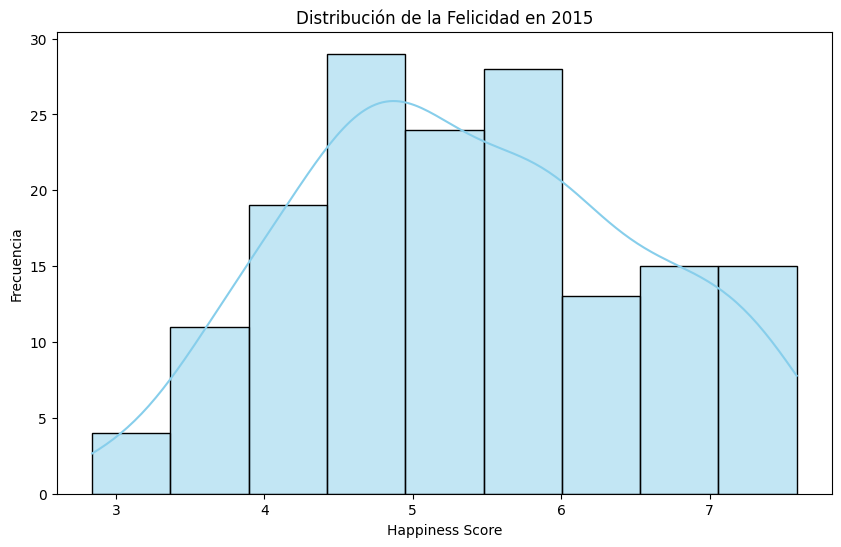

In [4]:
# Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset de 2015
data_2015 = pd.read_csv('../data/clean/2015_clean.csv')

## Markdown: Analizaremos la distribución del puntaje de felicidad de los países en 2015
plt.figure(figsize=(10, 6))
sns.histplot(data_2015['Happiness_Score'], kde=True, color='skyblue')
plt.title('Distribución de la Felicidad en 2015')
plt.xlabel('Happiness Score')
plt.ylabel('Frecuencia')
plt.show()

Analysis 2: Relationship between 'GDP_per_Capita' and 'Happiness_Score'
We will analyze the relationship between GDP per capita and the happiness score

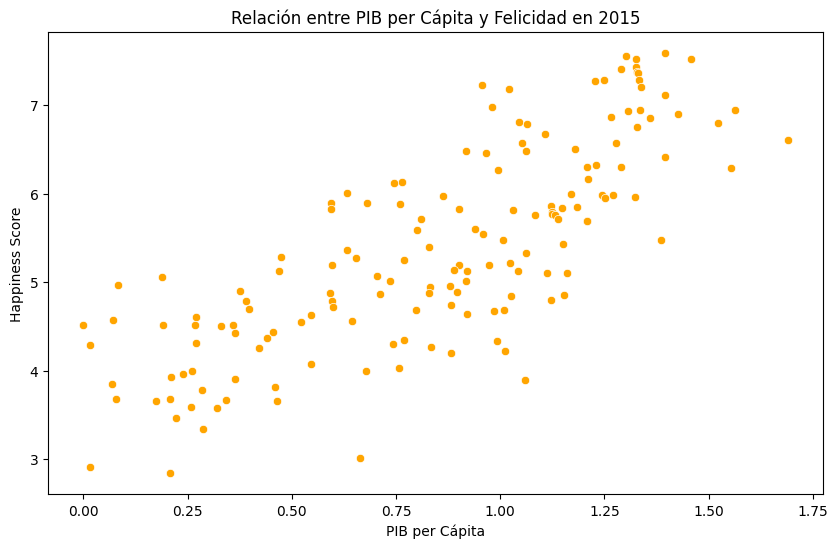

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP_per_Capita', y='Happiness_Score', data=data_2015, color='orange')
plt.title('Relación entre PIB per Cápita y Felicidad en 2015')
plt.xlabel('PIB per Cápita')
plt.ylabel('Happiness Score')
plt.show()



Analysis 3: Correlation between variables
We will analyze the correlation matrix between the variables of the dataset.

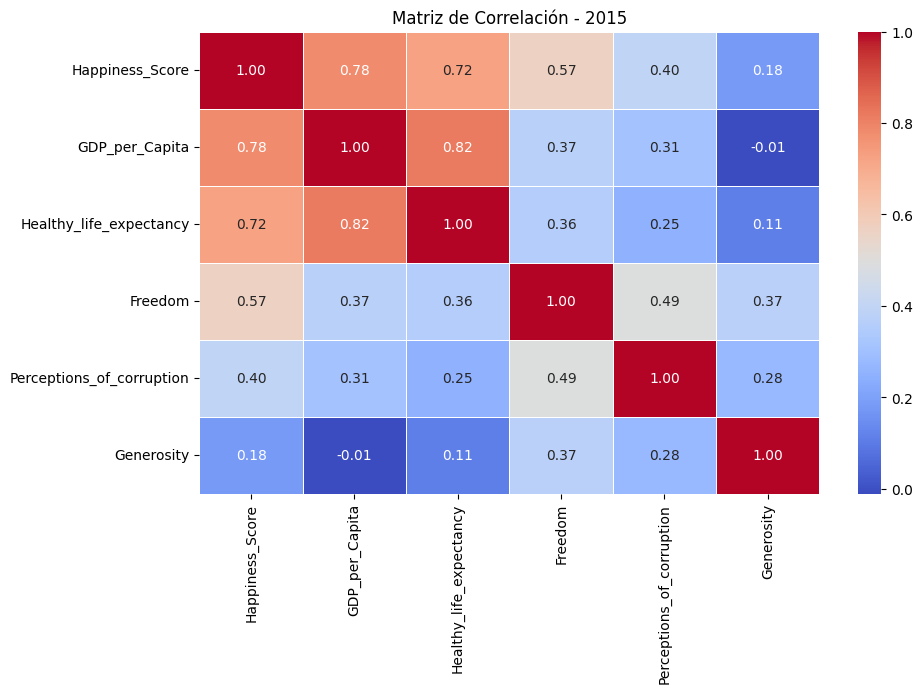

In [ ]:
correlation_matrix = data_2015[['Happiness_Score', 'GDP_per_Capita', 'Healthy_life_expectancy', 'Freedom', 'Perceptions_of_corruption', 'Generosity',]].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación - 2015')
plt.show()



Analysis 4: Distribution of 'Healthy_life_expectancy'
We will analyze the distribution of healthy life expectancy in 2015.

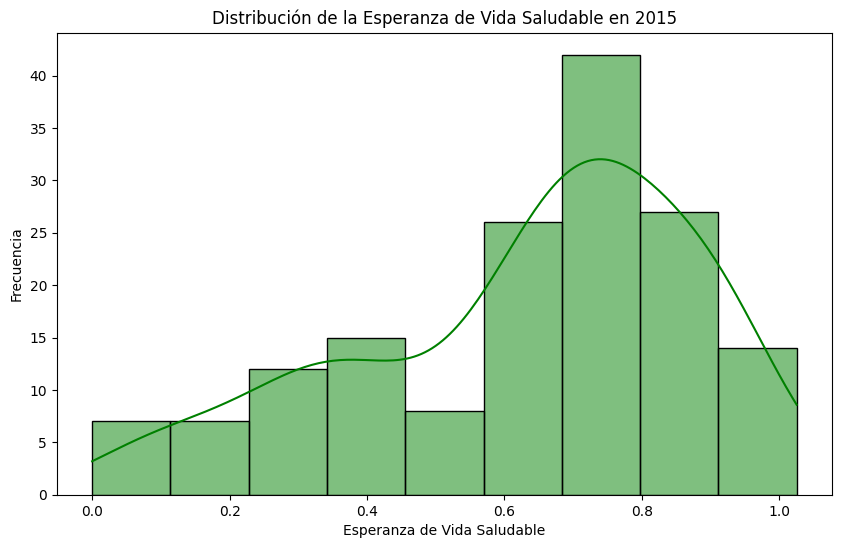

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data_2015['Healthy_life_expectancy'], kde=True, color='green')
plt.title('Distribución de la Esperanza de Vida Saludable en 2015')
plt.xlabel('Esperanza de Vida Saludable')
plt.ylabel('Frecuencia')
plt.show()